This is from [this article](https://medium.com/towards-data-science/complete-image-augmentation-in-opencv-31a6b02694f5) in Medium.

In [1]:
import random

import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
img = cv2.imread("arc_de_triomphe.jpg")

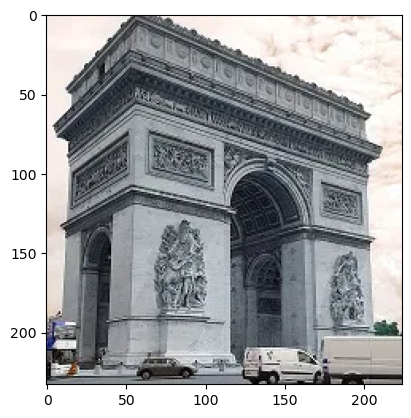

In [3]:
# Original
plt.imshow(img)

# Horizontal Shift

In [4]:
def fill(img, h, w):
    img = cv2.resize(img, (h, w), cv2.INTER_CUBIC)
    return img

In [5]:
def horizontal_shift(img, ratio=0.0):
    if ratio > 1 or ratio < 0:
        print("Value should be less than 1 and greater than 0")
        return img
    ratio = random.uniform(-ratio, ratio)
    h, w = img.shape[:2]
    to_shift = w * ratio
    if ratio > 0:
        img = img[:, : int(w - to_shift), :]
    if ratio < 0:
        img = img[:, int(-1 * to_shift) :, :]
    img = fill(img, h, w)
    return img

In [6]:
img_h_shift = horizontal_shift(img, 0.7)

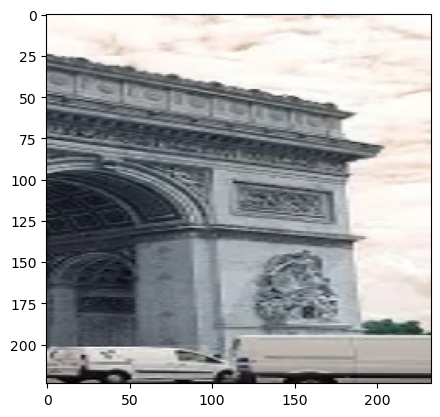

In [7]:
plt.imshow(img_h_shift)

# Vertical Shift

In [8]:
def vertical_shift(img, ratio=0.0):
    if ratio > 1 or ratio < 0:
        print("Value should be less than 1 and greater than 0")
        return img
    ratio = random.uniform(-ratio, ratio)
    h, w = img.shape[:2]
    to_shift = h * ratio
    if ratio > 0:
        img = img[: int(h - to_shift), :, :]
    if ratio < 0:
        img = img[int(-1 * to_shift) :, :, :]
    img = fill(img, h, w)
    return img

In [9]:
img_v_shift = vertical_shift(img, 0.7)

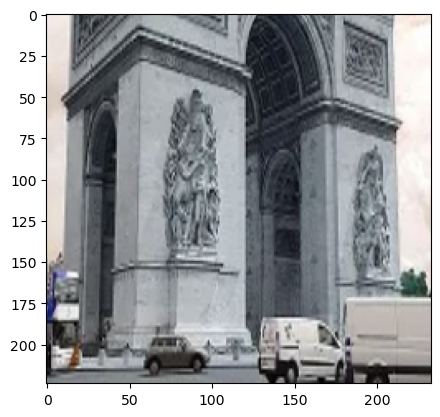

In [10]:
plt.imshow(img_v_shift)

# Brightness

In [11]:
def brightness(img, low, high):
    value = random.uniform(low, high)
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    hsv = np.array(hsv, dtype=np.float64)
    hsv[:, :, 1] = hsv[:, :, 1] * value
    hsv[:, :, 1][hsv[:, :, 1] > 255] = 255
    hsv[:, :, 2] = hsv[:, :, 2] * value
    hsv[:, :, 2][hsv[:, :, 2] > 255] = 255
    hsv = np.array(hsv, dtype=np.uint8)
    img = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
    return img

In [12]:
img_bright = brightness(img, 0.5, 3)

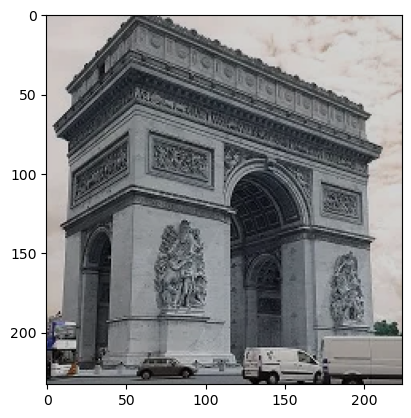

In [13]:
plt.imshow(img_bright)

# Zoom

In [14]:
def zoom(img, value):
    if value > 1 or value < 0:
        print("Value for zoom should be less than 1 and greater than 0")
        return img
    value = random.uniform(value, 1)
    h, w = img.shape[:2]
    h_taken = int(value * h)
    w_taken = int(value * w)
    h_start = random.randint(0, h - h_taken)
    w_start = random.randint(0, w - w_taken)
    img = img[h_start : h_start + h_taken, w_start : w_start + w_taken, :]
    img = fill(img, h, w)
    return img

In [15]:
img_zoom = zoom(img, 0.5)

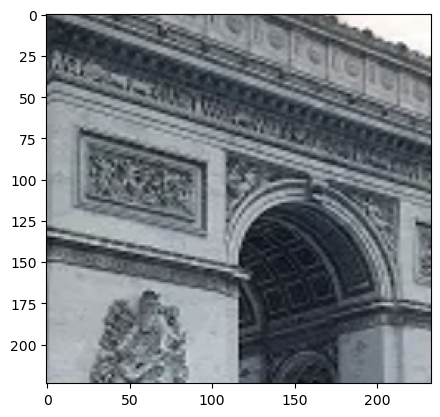

In [16]:
plt.imshow(img_zoom)

# Channel Shift

In [17]:
def channel_shift(img, value):
    value = int(random.uniform(-value, value))
    img = img + value
    img[:, :, :][img[:, :, :] > 255] = 255
    img[:, :, :][img[:, :, :] < 0] = 0
    img = img.astype(np.uint8)
    return img

In [18]:
img_ch_shift = channel_shift(img, 60)

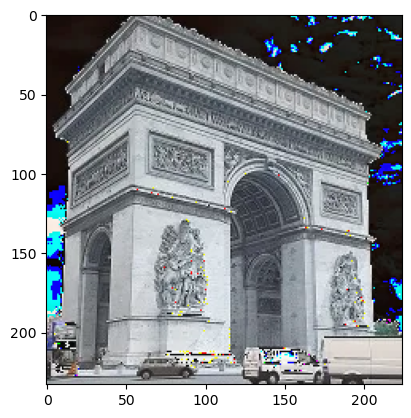

In [19]:
plt.imshow(img_ch_shift)

# Horizontal Flip

In [20]:
def horizontal_flip(img, flag):
    if flag:
        return cv2.flip(img, 1)
    else:
        return img

In [21]:
img_h_flip = horizontal_flip(img, True)

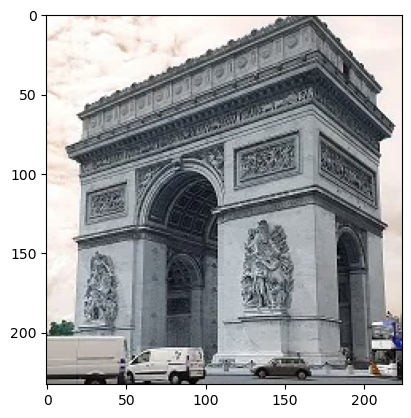

In [22]:
plt.imshow(img_h_flip)

# Vertical Flip

In [23]:
def vertical_flip(img, flag):
    if flag:
        return cv2.flip(img, 0)
    else:
        return img

In [24]:
img_v_flip = vertical_flip(img, True)

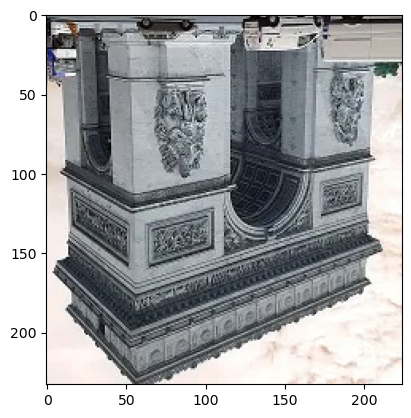

In [25]:
plt.imshow(img_v_flip)

# Rotation

In [26]:
def rotation(img, angle):
    angle = int(random.uniform(-angle, angle))
    h, w = img.shape[:2]
    M = cv2.getRotationMatrix2D((int(w / 2), int(h / 2)), angle, 1)
    img = cv2.warpAffine(img, M, (w, h))
    return img

In [27]:
img_rot = rotation(img, 30)

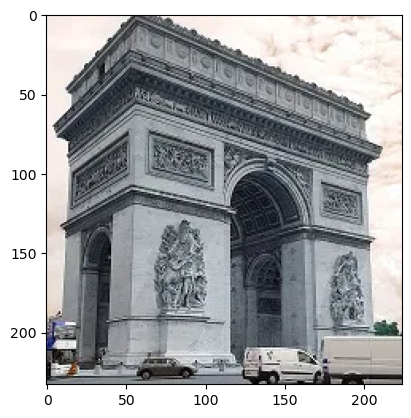

In [28]:
plt.imshow(img_rot)

# Fill Mode

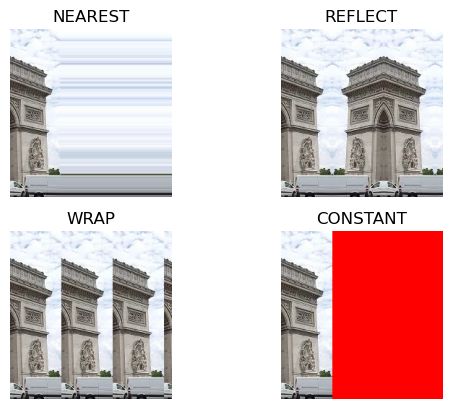

In [29]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


def fill_mode(img, left, right):
    nearest = cv2.copyMakeBorder(img, 0, 0, left, right, cv2.BORDER_REPLICATE)
    reflect = cv2.copyMakeBorder(img, 0, 0, left, right, cv2.BORDER_REFLECT)
    wrap = cv2.copyMakeBorder(img, 0, 0, left, right, cv2.BORDER_WRAP)
    constant = cv2.copyMakeBorder(
        img, 0, 0, left, right, cv2.BORDER_CONSTANT, value=(255, 0, 0)
    )

    plt.subplot(221), plt.imshow(nearest, "gray"), plt.title("NEAREST"), plt.axis("off")
    plt.subplot(222), plt.imshow(reflect, "gray"), plt.title("REFLECT"), plt.axis("off")
    plt.subplot(223), plt.imshow(wrap, "gray"), plt.title("WRAP"), plt.axis("off")
    plt.subplot(224), plt.imshow(constant, "gray"), plt.title("CONSTANT"), plt.axis(
        "off"
    )


def horizontal_shift_mode(img, ratio):
    if ratio > 1 or ratio < 0:
        print("Value for horizontal shift should be less than 1 and greater than 0")
        return img
    ratio = random.uniform(-ratio, ratio)
    h, w = img.shape[:2]
    to_shift = int(w * ratio)
    if ratio > 0:
        img = img[:, : w - to_shift, :]
        fill_mode(img, to_shift, 0)
    if ratio < 0:
        img = img[:, -1 * to_shift :, :]
        fill_mode(img, 0, -1 * to_shift)


horizontal_shift_mode(img, 0.8)